In [193]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
with MPRester("CBIGbbbqQQkuWWiae") as m:
    bs = m.get_bandstructure_by_material_id("mp-169")

Structures de bandes électroniques du C (mp-169) :


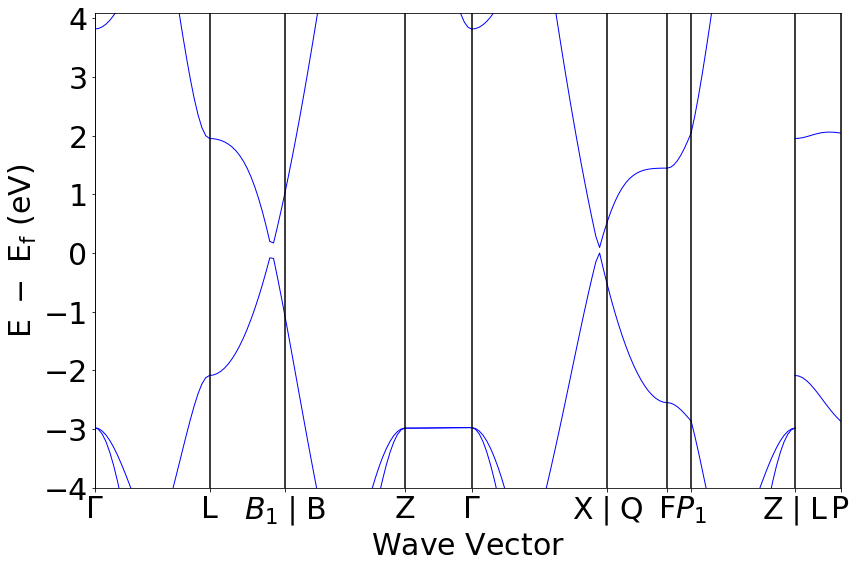

In [194]:
bs_plotter = BSPlotter(bs)
print("Structures de bandes électroniques du C (mp-169) :")
bs_plotter.show()

In [195]:
print("Détermination de la bande interdite :")
print(" ")
BG = bs.get_band_gap()
print(BG)
print(" ")
print("On observe une bande interdite directe de 0.095 eV dans la structure électronique, au vu de la différence d'énergie associée à la bande interdite, il s'agit d'un semiconducteur (Egap < 1 eV).")

Détermination de la bande interdite :
 
{'direct': True, 'energy': 0.0945999999999998, 'transition': '(0.327,0.000,-0.327)-(0.327,0.000,-0.327)'}
 
On observe une bande interdite directe de 0.095 eV dans la structure électronique, au vu de la différence d'énergie associée à la bande interdite, il s'agit d'un semiconducteur (Egap < 1 eV).


In [196]:
data = bs_plotter.bs_plot_data()

In [197]:
E = data.get('energy')
D = data.get('ticks').get('distance')
DD = [D[0],D[1],D[3],D[4],D[6],D[8],D[9],D[11],D[13],D[14]]

In [198]:
# Distance entre deux branches (lignes verticales sur la graphe ci-dessus)
D1 = DD[1] - DD[0]
D2 = DD[2] - DD[1]
D3 = DD[3] - DD[2]
D4 = DD[4] - DD[3]
D5 = DD[5] - DD[4]
D6 = DD[6] - DD[5]
D7 = DD[7] - DD[6]
D8 = DD[8] - DD[7]
D9 = DD[9] - DD[8]

# Pente entre chaque branche de la dernière bande de valence
pente1V = ((E[0].get('1')[3])[30] - (E[0].get('1')[3])[0])/D1
pente2V = ((E[1].get('1')[3])[20] - (E[1].get('1')[3])[0])/D2
pente3V = ((E[2].get('1')[3])[32] - (E[2].get('1')[3])[0])/D3
pente4V = ((E[3].get('1')[3])[18] - (E[3].get('1')[3])[0])/D4
pente5V = ((E[4].get('1')[3])[36] - (E[4].get('1')[3])[0])/D5
pente6V = ((E[5].get('1')[3])[16] - (E[5].get('1')[3])[0])/D6
pente7V = ((E[6].get('1')[3])[7] - (E[6].get('1')[3])[0])/D7
pente8V = ((E[7].get('1')[3])[28] - (E[7].get('1')[3])[0])/D8
pente9V = ((E[8].get('1')[3])[12] - (E[8].get('1')[3])[0])/D9

# Pente entre chaque branche de la première bande de conduction
pente1C = ((E[0].get('1')[4])[30] - (E[0].get('1')[4])[0])/D1
pente2C = ((E[1].get('1')[4])[20] - (E[1].get('1')[4])[0])/D2
pente3C = ((E[2].get('1')[4])[32] - (E[2].get('1')[4])[0])/D3
pente4C = ((E[3].get('1')[4])[18] - (E[3].get('1')[4])[0])/D4
pente5C = ((E[4].get('1')[4])[36] - (E[4].get('1')[4])[0])/D5
pente6C = ((E[5].get('1')[4])[16] - (E[5].get('1')[4])[0])/D6
pente7C = ((E[6].get('1')[4])[7] - (E[6].get('1')[4])[0])/D7
pente8C = ((E[7].get('1')[4])[28] - (E[7].get('1')[4])[0])/D8
pente9C = ((E[8].get('1')[4])[12] - (E[8].get('1')[4])[0])/D9

In [199]:
print("Dispersion des bandes électroniques :")
print(" ")
dispmaxV = max(abs(pente1V),abs(pente2V),abs(pente3V),abs(pente4V),abs(pente5V),abs(pente6V),abs(pente7V),abs(pente8V),abs(pente9V))
print(dispmaxV, " = pente6V --> La bande de valence présente le plus de dispersion dans la direction X|Q - F")
dispminV = min(abs(pente1V),abs(pente2V),abs(pente3V),abs(pente4V),abs(pente5V),abs(pente6V),abs(pente7V),abs(pente8V),abs(pente9V))
print(dispminV, " = pente4V --> La bande de valence présente le moins de dispersion dans la direction Z - \u0393")
dispmaxC = max(abs(pente1C),abs(pente2C),abs(pente3C),abs(pente4C),abs(pente5C),abs(pente6C),abs(pente7C),abs(pente8C),abs(pente9C))
print(dispmaxC, " = pente4C --> La bande de conduction présente le plus de dispersion dans la direction Z - \u0393")
dispminC = min(abs(pente1C),abs(pente2C),abs(pente3C),abs(pente4C),abs(pente5C),abs(pente6C),abs(pente7C),abs(pente8C),abs(pente9C))
print(dispminC, " = pente9V --> La bande de conduction présente le moins de dispersion dans la direction Z|L - P")

Dispersion des bandes électroniques :
 
2.5832264292194473  = pente6V --> La bande de valence présente le plus de dispersion dans la direction X|Q - F
0.009649674846002978  = pente4V --> La bande de valence présente le moins de dispersion dans la direction Z - Γ
5.199336708691353  = pente4C --> La bande de conduction présente le plus de dispersion dans la direction Z - Γ
0.15789673547760266  = pente9V --> La bande de conduction présente le moins de dispersion dans la direction Z|L - P


In [200]:
K = data.get('distances')
KK = [y for x in K for y in x]
EV = E[0].get('1')[3]+E[1].get('1')[3]+E[2].get('1')[3]+E[3].get('1')[3]+E[4].get('1')[3]+E[5].get('1')[3]+E[6].get('1')[3]+E[7].get('1')[3]+E[8].get('1')[3]
EC = E[0].get('1')[4]+E[1].get('1')[4]+E[2].get('1')[4]+E[3].get('1')[4]+E[4].get('1')[4]+E[5].get('1')[4]+E[6].get('1')[4]+E[7].get('1')[4]+E[8].get('1')[4]

Les deux graphes ci-dessous représentent, dans l'ordre, la dernière bande de valence et la première bande de conduction séparément, de manière à mieux pouvoir les visualiser. Les calculs effectués ci-dessus ont permis d'obtenir les directions dans lesquelles la dispersion est la moins grande et celles dans lesquelles elle est la plus grande. Il suffit pour cela de calculer les pentes entre deux branches (lignes verticales) mitoyennes et de trouver la plus petite et la plus grande. Les directions qui présentent le moins de despersion sont représentées par des flèches vertes, tandis que celles qui en présentent le plus sont représentées par des flèches rouges.

On remarque bel et bien que pour la dernière bande de valence (premier graphe), la direction qui présente le moins de dispersion est la direction Z - Gamma, tandis que celle qui en présente le plus est la direction X|Q - F.

Pour ce qui est de la première bande de conduction, la direction Z|L - P présente le moins de dispersion et la direction Z - Gamma en présente le plus.

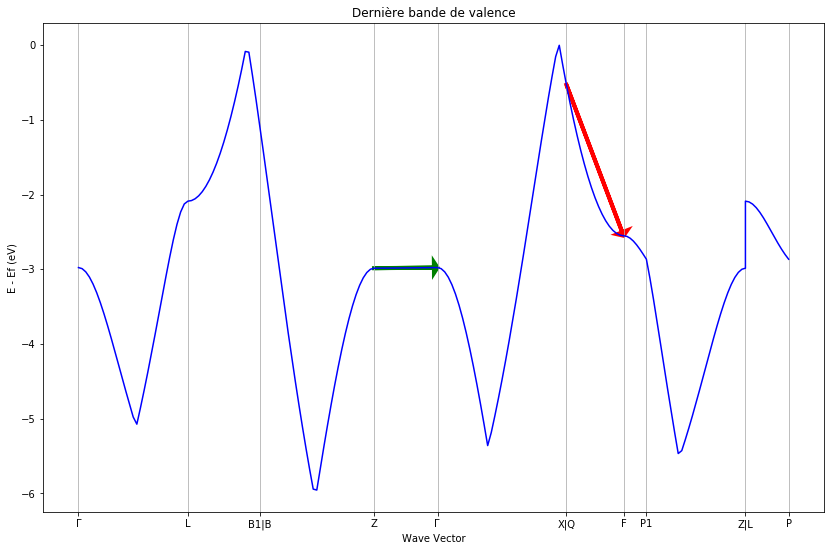

In [201]:
fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(KK, EV, "b-")
plt.arrow(DD[5], (E[5].get('1')[3])[0], DD[6] - DD[5], (E[5].get('1')[3])[16] - (E[5].get('1')[3])[0], head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)
plt.arrow(DD[3], (E[3].get('1')[3])[0], DD[4] - DD[3], (E[3].get('1')[3])[18] - (E[3].get('1')[3])[0], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(DD)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Dernière bande de valence')
axes = plt.gca()
axes.xaxis.grid()

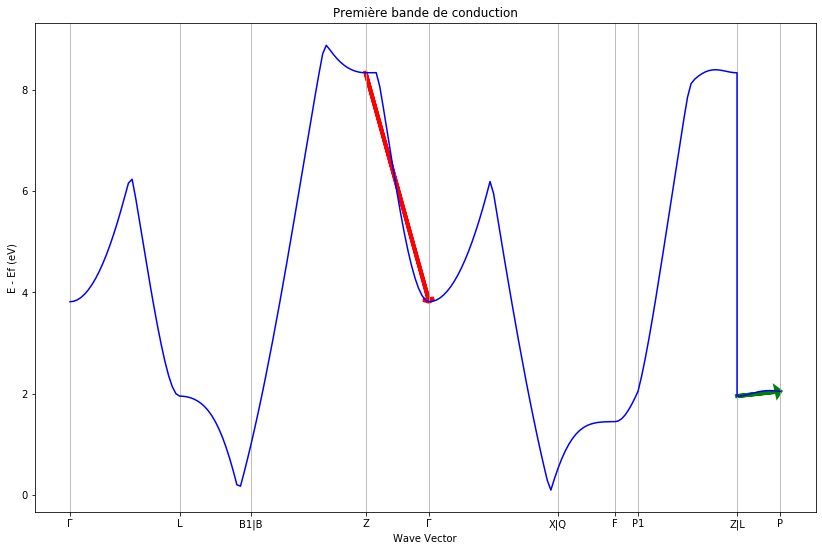

In [202]:
fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(KK, EC, "b-")
plt.arrow(DD[3], (E[3].get('1')[4])[0], DD[4] - DD[3], (E[3].get('1')[4])[18] - (E[3].get('1')[4])[0], head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)
plt.arrow(DD[8], (E[8].get('1')[4])[0], DD[9] - DD[8], (E[8].get('1')[4])[12] - (E[8].get('1')[4])[0], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(DD)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector')
ax.set_title('Première bande de conduction')
axes = plt.gca()
axes.xaxis.grid()

In [203]:
print("Calcul de la masse effective m* :")
print(" ")
print("Le calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) s'effectue via la")
print("formule suivante :")

Calcul de la masse effective m* :
 
Le calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) s'effectue via la
formule suivante :


 ![](masse_effective.png)

où h = 1.055*10^-34 J.s est la constante de Planck et où le terme au dénominateur correspond à la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k (dont les unités sont des 1/Angstrom).

Pour calculer les dérivées secondes, il faut supposer que la dispersion est parabolique. C'est ce qui a été fait sur les deux graphes ci-dessous, en approximant respectivement la sommet de la dernière bande de valence et la base de la bande de conduction par des paraboles. (Ces paraboles sont calculées à l'aide du maximum de valence ou du minimum de conduction et d'un autre point, typiquement un point de la bande sur une des branches voisines)

1) Dernière bande de valence :
 
Maximum de la courbe en : (k1,E1) = ( 6.581130778752894 , 0.0 )
Point sur la branche X|Q voisine en : (k2,E2) = ( 6.679115170829115 , -0.5281000000000002 )
 
Equation de la parabole dont le sommet est (k1,E1) et qui passe par le point (k2,E2) :
f(k) =  -55.00502450952315 *(k- 6.581130778752894 )²


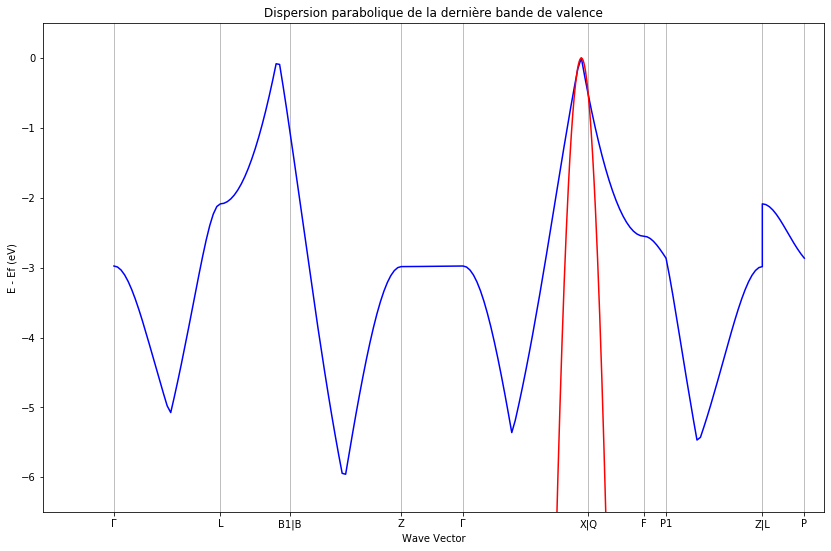

In [204]:
h = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

print("1) Dernière bande de valence :")
print(" ")
print("Maximum de la courbe en : (k1,E1) = (",(K[4])[34],",",((E[4].get('1')[3]))[34],")")
print("Point sur la branche X|Q voisine en : (k2,E2) = (",DD[5],",",(E[4].get('1')[3])[36],")")
a = (E[4].get('1')[3])[36]/(DD[5]-(K[4])[34])**2
fppV = 2*a
print(" ")
print("Equation de la parabole dont le sommet est (k1,E1) et qui passe par le point (k2,E2) :")
print("f(k) = ", a, "*(k-", (K[4])[34],")²")

def f(x):
    return a*(x-(K[4])[34])**2

x = np.arange(5.0,7.0,0.01)
y=f(x)


fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(KK, EV, "b-")
plt.plot(x,y,'r')
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(DD)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Dispersion parabolique de la dernière bande de valence')
axes = plt.gca()
axes.xaxis.grid()
plt.xlim(-1.0,10.0)
plt.ylim(-6.5,0.5)
plt.show()

In [205]:
print("Il est dès lors possible de calculer la dérivée seconde de cette parabole, celle-ci étant :")
print("f''(k) = ",fppV,"eV.A^2 (où 1A = 10^-10 m)")
print("--> f''(k) = ",fppV*A**(2),"eV.m^2")
print("Il faut néanmoins transformer cette valeur de la dérivée seconde en J.m^2 (et on sait que 1 eV = 1.602*10^-19 J) :")
fppVeV = fppV*(A**(2))*eV
print("f''(k) = ",fppVeV,"J.m^2")
print(" ")
print("La masse effective au sommet de la dernière bande de valence vaut donc :")
mV = h**2/abs(fppVeV)
print("m* = ",mV,"kg")

Il est dès lors possible de calculer la dérivée seconde de cette parabole, celle-ci étant :
f''(k) =  -110.0100490190463 eV.A^2 (où 1A = 10^-10 m)
--> f''(k) =  -1.1001004901904632e-18 eV.m^2
Il faut néanmoins transformer cette valeur de la dérivée seconde en J.m^2 (et on sait que 1 eV = 1.602*10^-19 J) :
f''(k) =  -1.7625552223279716e-37 J.m^2
 
La masse effective au sommet de la dernière bande de valence vaut donc :
m* =  6.30971276945832e-32 kg


2) Première bande de conduction :
 
Minimum de la courbe en : (k1,E1) = ( 6.581130778752894 , 0.0945999999999998 )
Point sur la branche X|Q voisine en : (k2,E2) = ( 6.679115170829115 , 0.5252999999999997 )
 
Equation de la parabole dont la base est (k1,E1) et qui passe par le point (k2,E2) :
f(k) =  44.86018567743155 *(k- 6.581130778752894 )² + 0.0945999999999998


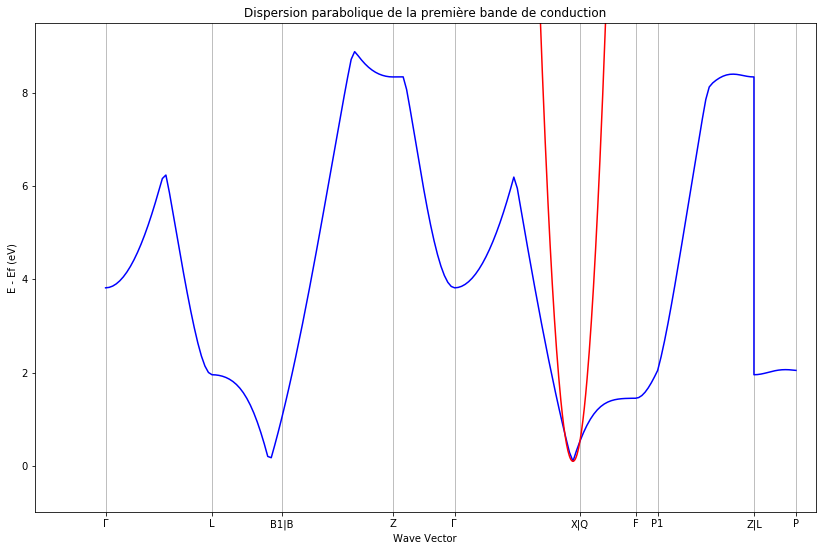

In [206]:
print("2) Première bande de conduction :")
print(" ")
print("Minimum de la courbe en : (k1,E1) = (",(K[4])[34],",",(E[4].get('1')[4])[34],")")
print("Point sur la branche X|Q voisine en : (k2,E2) = (",DD[5],",",(E[4].get('1')[4])[36],")")
b = ((E[4].get('1')[4])[36]-(E[4].get('1')[4])[34])/(DD[5]-(K[4])[34])**2
fppC = 2*b
print(" ")
print("Equation de la parabole dont la base est (k1,E1) et qui passe par le point (k2,E2) :")
print("f(k) = ", b, "*(k-", (K[4])[34],")² +",(E[4].get('1')[4])[34])

def f(x):
    return b*(x-(K[4])[34])**2 + (E[4].get('1')[4])[34]

x = np.arange(5.0,9.0,0.01)
y=f(x)


fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(KK, EC, "b-")
plt.plot(x,y,'r')
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(DD)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Dispersion parabolique de la première bande de conduction')
axes = plt.gca()
axes.xaxis.grid()
plt.xlim(-1.0,10.0)
plt.ylim(-1.0,9.5)
plt.show()

In [207]:
print("Comme précedemment, il est possible de calculer la dérivée seconde de cette parabole, celle-ci étant :")
print("f''(k) = ",fppC,"eV.A^2")
print("--> f''(k) = ",fppC*A**(2),"eV.m^2")
print("Il faut néanmoins transformer cette valeur de la dérivée seconde en J.m^2 (et on sait que 1 eV = 1.602*10^-19 J) :")
fppCeV = fppC*A**(2)*eV
print("f''(k) = ",fppCeV,"J.m^2")
print(" ")
print("La masse effective à la base de la première bande de conduction vaut donc :")
mC = h**2/fppCeV
print("m* = ",mC,"kg")

Comme précedemment, il est possible de calculer la dérivée seconde de cette parabole, celle-ci étant :
f''(k) =  89.7203713548631 eV.A^2
--> f''(k) =  8.972037135486312e-19 eV.m^2
Il faut néanmoins transformer cette valeur de la dérivée seconde en J.m^2 (et on sait que 1 eV = 1.602*10^-19 J) :
f''(k) =  1.4374787620841824e-37 J.m^2
 
La masse effective à la base de la première bande de conduction vaut donc :
m* =  7.736613219296358e-32 kg
